In [182]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import chardet
import matplotlib.pyplot as pt
#from unidecode import unidecode

## Encoding file

In [144]:
#Checking for encoding using Chardet, but had no luck
with open("rounds2.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [183]:
#Going with defailt ISO-8859-1
companies  = pd.read_csv("companies.csv", encoding = 'ISO-8859-1')
rounds2 = pd.read_csv("rounds2.csv", encoding='ISO-8859-1')

In [184]:
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [185]:
#companies.permalink = companies.permalink.apply(lambda x : unidecode(x))  --- didnt convert correctly, not satisfied
companies['permalink'] = companies['permalink'].apply(lambda x : x.encode('ascii', 'ignore').decode('ascii', 'ignore'))
companies['name'] = companies['name'].astype('str').apply(lambda x : x.encode('ascii', 'ignore').decode('ascii', 'ignore'))

In [186]:
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/Eron,ERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Novatiff-Reklam-Ve-TanTM-Hizmetl...,novatiff Reklam ve Tantm Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [187]:
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [188]:
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x : x.encode('ascii', 'ignore').decode('ascii', 'ignore'))

In [189]:
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/novatiff-reklam-ve-tantm-hizmetl...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [190]:
rounds2.shape

(114949, 6)

In [191]:
companies.shape

(66368, 10)

# Checkpoint 1: Data Cleaning 1

### Checking for null values in Company

In [192]:
companies.isnull().sum()

permalink            0
name                 0
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [193]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [194]:
companies[companies.isnull().sum(axis = 1) > 4].shape

(3998, 10)

In [195]:
rounds2[rounds2.isnull().sum(axis = 1) > 2].shape

(0, 6)

In [196]:
rounds2[rounds2.raised_amount_usd.isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
14,/organization/1,/funding-round/5de6d8828aef7d925d97918d15727670,undisclosed,NaN,05-02-2013,NaN
17,/ORGANIZATION/1-4-ALL,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,NaN
18,/organization/1-618-technology,/funding-round/83b8f4c7d37ecef5e001a5e953bf461a,equity_crowdfunding,NaN,22-01-2014,NaN
...,...,...,...,...,...,...
114899,/ORGANIZATION/ZYMR-INC-,/funding-round/9048d1a80edeae803ed1790c9f473eec,angel,NaN,12-12-2012,NaN
114905,/ORGANIZATION/ZYNERGY-PROJECTS-SERVICES,/funding-round/3d7dbd2d92220d93e2b5455f914a0918,venture,NaN,19-08-2015,NaN
114913,/ORGANIZATION/ZYNGA,/funding-round/d27f10a20b15b4ef3d9961d54eabf6b1,angel,NaN,01-01-2007,NaN
114927,/ORGANIZATION/ZYPSEE,/funding-round/c67e22c5448435adaf5a2d101e449dde,seed,NaN,26-07-2013,NaN


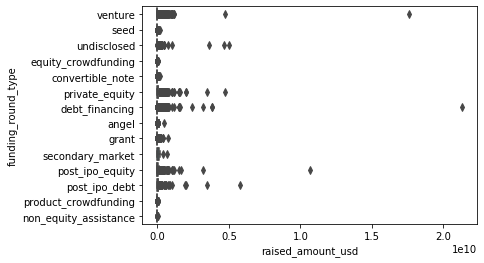

In [197]:
sns.boxplot(data = rounds2, y = 'funding_round_type' , x = 'raised_amount_usd' )
#Outliers present

In [198]:
rounds2.groupby("funding_round_type")["raised_amount_usd"].median()

funding_round_type
angel                      400000.0
convertible_note           272000.0
debt_financing            1100000.0
equity_crowdfunding        100000.0
grant                      201684.0
non_equity_assistance       60000.0
post_ipo_debt            19950000.0
post_ipo_equity          12262852.5
private_equity           20000000.0
product_crowdfunding       183915.0
secondary_market         32600000.0
seed                       275000.0
undisclosed               1018680.0
venture                   5000000.0
Name: raised_amount_usd, dtype: float64

In [199]:
rounds2[rounds2["raised_amount_usd"].isnull()] .groupby("funding_round_type")['company_permalink'].count()

funding_round_type
angel                    1234
convertible_note          370
debt_financing            213
equity_crowdfunding      2029
grant                      76
non_equity_assistance     118
post_ipo_equity            10
private_equity            349
product_crowdfunding       24
secondary_market           65
seed                     6921
undisclosed              3315
venture                  5266
Name: company_permalink, dtype: int64

In [200]:
(19990/114949)*100 #17% data is null values

17.390320924931927

In [201]:
#Ignoring null values in funding_round_type for now. Will replace them in furture analysis if needed

### Filling missing values

In [202]:
companies[companies.name.isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [203]:
companies.loc[companies['permalink'] == '/Organization/Tell-It-In','name'] = 'Tell It In'

### Chaning permalink to lowercase so that they match in both dataframes

In [204]:
rounds2["company_permalink"] = rounds2["company_permalink"].apply(lambda x : x.lower())

In [205]:
companies["permalink"] = companies["permalink"].apply(lambda x : x.lower())

### Adding ['permalink','name'] to rounds2 dataframe to get unique company names 

In [206]:
df_rounds = rounds2.merge(companies[['permalink','name']], how = 'left', left_on = "company_permalink", right_on = "permalink")

### How many unique companies are present in rounds2?

In [207]:
len(df_rounds.name.unique()) #Unique company names in rounds2 66100

66100

### How many unique companies are present in the companies file?

In [208]:
len(companies.name.unique()) #Unique company_names in companies 66100

66100

### In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.m

In [209]:
len(companies.permalink.value_counts().index.to_list()) 

66368

In [210]:
companies.shape #Answer : Permalink

(66368, 10)

### Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

In [211]:
df_rounds.name.isnull().sum() # Answer : N

0

### Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [212]:
master_frame = rounds2.merge(companies, how = 'left', left_on = "company_permalink", right_on = "permalink")

In [213]:
master_frame.name.isnull().sum() 

0

In [214]:
master_frame.shape # Answer : (114949, 16)

(114949, 16)

# Table 2.1

### Cleaning master_frame

### droping one permalink column as it is redudant

In [215]:
master_frame.drop(columns='permalink', inplace = True)

In [216]:
master_frame.head(1)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN


### Droping unawanted columns from master_frame

In [217]:
master_frame.drop(columns=['funding_round_permalink','funding_round_code','funded_at','homepage_url','state_code','region','city','founded_at'], inplace = True)

In [218]:
master_frame

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND
1,/organization/-qounter,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/organization/-the-one-of-them-inc-,venture,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN
...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,convertible_note,41313.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
114945,/organization/zzzzapp-com,seed,32842.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
114946,/organization/eron,venture,NaN,ERON,NaN,operating,NaN
114947,/organization/asys-2,seed,18192.0,asys,Consumer Electronics|Internet of Things|Teleco...,operating,USA


In [219]:
master_frame.isnull().sum()

company_permalink         0
funding_round_type        0
raised_amount_usd     19990
name                      0
category_list          3410
status                    0
country_code           8678
dtype: int64

In [220]:
#Removing rows with null value rows in all 3 columns ["raised_amount_usd","category_list","country_code"]
master_frame = master_frame[master_frame[["raised_amount_usd","category_list","country_code"]].isnull().sum(axis = 1) != 3]

In [221]:
master_frame.isnull().sum()

company_permalink         0
funding_round_type        0
raised_amount_usd     18784
name                      0
category_list          2204
status                    0
country_code           7472
dtype: int64

In [222]:
master_frame.shape

(113743, 7)

In [223]:
master_frame.isnull().sum()

company_permalink         0
funding_round_type        0
raised_amount_usd     18784
name                      0
category_list          2204
status                    0
country_code           7472
dtype: int64

### Average funding amount of venture type

In [224]:
round((master_frame.groupby(['funding_round_type'])["raised_amount_usd"].mean().venture),2) #11748949.13

11748949.13

In [225]:
round((master_frame.groupby(['funding_round_type'])["raised_amount_usd"].median().venture),2) #5000000.0

5000000.0

### Average funding amount of seed type

In [226]:
round((master_frame.groupby(['funding_round_type'])["raised_amount_usd"].mean().seed),2)  #719818.0

719818.0

### Average funding amount of angel type

In [227]:
round((master_frame.groupby(['funding_round_type'])["raised_amount_usd"].mean().angel),2) #958694.47

958694.47

### Average funding amount of private equity type

In [228]:
round((master_frame.groupby(['funding_round_type'])["raised_amount_usd"].mean().private_equity),2) #73308593.03

73308593.03

### Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?



### Filtering data with investment amout between 5000000,15000000


In [229]:
master_frame = master_frame[master_frame["raised_amount_usd"].between(5000000,15000000)]

In [230]:
#Creating new dataframe for easy analysis

Funding_type = round((master_frame.groupby(['funding_round_type'])["raised_amount_usd"].median())).reset_index()

In [231]:
Funding_type_frequency = round((master_frame.groupby(['funding_round_type'])["raised_amount_usd"].count()/master_frame["raised_amount_usd"].count())*100).reset_index()

In [232]:
Funding_type = Funding_type.merge(Funding_type_frequency, how = 'inner', on = 'funding_round_type')

In [233]:
Funding_type = Funding_type.rename(columns = {'raised_amount_usd_x' : 'Average investment amount','funding_round_type':'Funding Type', "raised_amount_usd_y":'Investments(%)' })

In [234]:
Funding_type[Funding_type["Average investment amount"].between(5000000,15000000)]

,Funding Type,Average investment amount,Investments(%)
0,angel,6500000.0,0.0
1,convertible_note,6925436.0,0.0
2,debt_financing,7500000.0,5.0
3,equity_crowdfunding,6000000.0,0.0
4,grant,8100000.0,1.0
5,non_equity_assistance,15000000.0,0.0
6,post_ipo_debt,9750000.0,0.0
7,post_ipo_equity,9276438.0,1.0
8,private_equity,9469746.0,2.0
9,product_crowdfunding,8782571.0,0.0


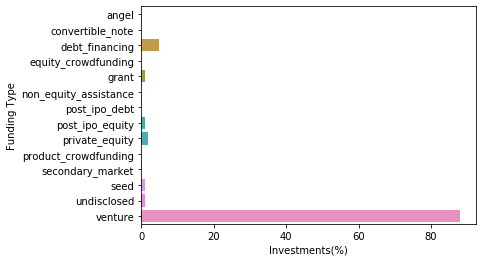

In [235]:

sns.barplot(data = Funding_type, y = 'Funding Type', x = 'Investments(%)')
pt.show()

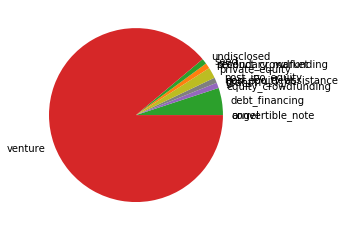

In [236]:
pt.pie(Funding_type['Investments(%)'], labels = Funding_type['Funding Type'])
pt.show()
#Not suitable

### Filtering master frame with funding type = venture

In [237]:
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']

In [238]:
master_frame.shape

(16598, 7)

In [239]:
master_frame[master_frame["raised_amount_usd"].between(5000000,15000000)]

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND
12,/organization/0xdata,venture,8900000.0,H2O.ai,Analytics,operating,USA
22,/organization/1-mainstream,venture,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA
46,/organization/1001-menus,venture,6602694.0,ZenChef,Local Businesses|Restaurants,operating,FRA
50,/organization/1001pharmacies-com,venture,8900000.0,1001pharmacies.com,Cosmetics|Marketplaces,operating,FRA
...,...,...,...,...,...,...,...
114916,/organization/zynstra,venture,8400000.0,Zynstra,Software,operating,GBR
114920,/organization/zyomyx-inc,venture,12000000.0,ZYOMYX,Biotechnology,operating,USA
114922,/organization/zyomyx-inc,venture,14219999.0,ZYOMYX,Biotechnology,operating,USA
114931,/organization/zyraz-technology,venture,7991547.0,Zyraz Technology,Biotechnology,closed,MYS


# Checkpoint3

In [240]:
master_frame.country_code.isnull().sum()

703

In [241]:
master_frame.country_code.value_counts()

USA    12150
GBR      628
CHN      533
CAN      426
IND      330
       ...  
URY        1
BMU        1
KAZ        1
BAH        1
LTU        1
Name: country_code, Length: 74, dtype: int64

### For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [242]:
top9 = round((master_frame.groupby(['country_code'])["raised_amount_usd"].sum())).sort_values(ascending = False)[:9].reset_index()

### Loading english speaking countries from wikipeidia 

In [243]:
countries = np.array([ 'AUS', 'NZL', 'GBR', 'USA', 'ATG', 'BHS', 'BRB', 'BLZ', 'BWA', 'BDI', 'CMR', 'CAN', 'COK', 'DMA','SWZ', 'FJI', 'GMB', 'GHA', 'GRD', 'GUY', 'IND', 'IRL', 'JAM', 'KEN', 'KIR', 'LSO', 'LBR', 'MWI', 'MLT', 'MHL', 'MUS', 'FSM', 'NAM', 'NRU', 'NGA', 'NIU', 'PAK', 'PLW', 'PNG', 'PHL', 'RWA', 'KNA', 'LCA', 'VCT', 'WSM', 'SYC', 'SLE', 'SGP', 'SLB', 'ZAF', 'SSD', 'SDN', 'TZA', 'TON', 'TTO', 'TUV', 'UGA', 'VUT', 'ZMB', 'ZWE'])
eng_countries = pd.DataFrame(countries, columns = ['countries'] )
eng_countries['English Speaking?'] = 'Yes'

In [244]:
eng_countries.head()

,countries,English Speaking?
0,AUS,Yes
1,NZL,Yes
2,GBR,Yes
3,USA,Yes
4,ATG,Yes


In [245]:
top9 = top9.merge(eng_countries, how = 'left', left_on = "country_code", right_on = "countries")

In [246]:
top9['English Speaking?'].fillna('No',inplace = True)

In [247]:
top9 = top9.rename(columns = {'country_code' : 'Country Code', 'raised_amount_usd' : 'Total amount invested'})

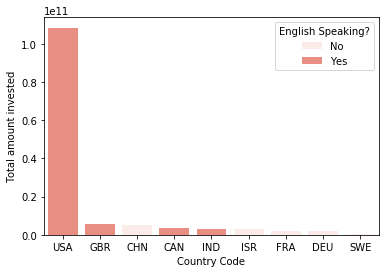

In [248]:
sns.barplot(data =top9 , x = 'Country Code', y = "Total amount invested", hue = 'English Speaking?', dodge=False, color="salmon", hue_order = ['No','Yes'] )

In [249]:
top3 = top9[top9['English Speaking?'] == 'Yes'].sort_values(by = 'Total amount invested', ascending = False)[0:3]['Country Code']

In [250]:
top3

0    USA
1    GBR
3    CAN
Name: Country Code, dtype: object

### Filtering values in master_frame with top 3 english speaking counties

In [251]:
master_frame = master_frame[(master_frame.country_code.isin(top3))]

# Checkpoint 4: Sector Analysis 1

In [252]:
Sector = pd.read_csv("mapping.csv")

In [253]:
#Function to assign primary secotrs to their respective main secors
main_sector_list = pd.Series(Sector.columns.values[1:])
def get_sectors(primary_sector_list):
    return main_sector_list[primary_sector_list.to_list()].to_list()[0]


In [254]:
#assigning main sector to Sector data frame
Sector["main_sector"] = Sector.iloc[:,1:].astype("boolean").apply(get_sectors, axis = 1)

### Data cleaning

In [255]:
Sector = Sector[Sector.category_list.notnull()]

In [256]:
#Upon looking at data, some of the primary sector name has '0' instead of na 
#which hinders data merging with master_frame 
Sector[Sector.category_list.str.contains('0', regex=False)]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
20,Alter0tive Medicine,0,0,0,0,1,0,0,0,0,Health
22,A0lytics,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
59,Big Data A0lytics,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
79,Business A0lytics,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
89,Can0bis,0,0,0,0,1,0,0,0,0,Health
91,Career Ma0gement,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
103,Chi0 Internet,0,0,0,0,0,0,1,0,0,"News, Search and Messaging"
114,Cloud Ma0gement,0,0,0,0,0,0,1,0,0,"News, Search and Messaging"
145,Contact Ma0gement,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
198,Digital Rights Ma0gement,0,0,0,1,0,0,0,0,0,Entertainment


In [257]:
#replacing all '0' with 'na except Enterprise 2.0 which is meant to be'
Sector["category_list"] = Sector["category_list"].apply(lambda x : x if x == 'Enterprise 2.0' else x.replace('0','na').title())

In [258]:
#Checking random data
Sector.loc[[474,557,515]]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
474,Navigation,0,0,0,0,0,0,1,0,0,"News, Search and Messaging"
557,Real Estate,0,0,0,0,0,0,0,1,0,Others
515,Personal Data,0,0,0,0,0,0,0,1,0,Others


In [259]:
Sector.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
1,3D,0,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,0,0,0,0,1,0,0,0,0,Health


In [260]:
#Changing datatype of category_list
master_frame["category_list"] = master_frame.category_list.astype('str')

In [261]:
#Considering string before first pipe symbol (|) as primary sector
master_frame["primary_sector"] = master_frame.category_list.apply(lambda x : x.split('|')[0].title())

In [262]:
#No of unique values in primary sector
len(master_frame.primary_sector.value_counts().index)

437

In [263]:
master_frame.primary_sector.isnull().sum()

0

### Adding main sector to master_frame

In [264]:
master_frame = master_frame.merge(Sector[['category_list','main_sector']], how = 'inner', left_on = "primary_sector", right_on = "category_list")

In [265]:
#dropping redundant columns
master_frame.drop(columns = 'category_list_y', inplace = True)

In [266]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
0,/organization/0xdata,venture,8900000.0,H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
1,/organization/accelerated-vision-group,venture,6000000.0,Accelerated Vision Group,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
2,/organization/accelops,venture,7000000.0,AccelOps,Analytics|Cloud Computing|Cloud Management|Net...,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
3,/organization/adaptive-insights,venture,14000000.0,Adaptive Insights,Analytics|Business Analytics|Cloud Data Servic...,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/adaptive-insights,venture,7500000.0,Adaptive Insights,Analytics|Business Analytics|Cloud Data Servic...,operating,USA,Analytics,"Social, Finance, Analytics, Advertising"


# Checkpoint 5: Sector Analysis 2

### Creating D1

In [267]:
D1 = master_frame[(master_frame.country_code == 'USA') & (master_frame.raised_amount_usd.between(5000000,15000000))]

In [268]:
USA_count = D1.groupby("main_sector")["company_permalink"].count().reset_index().rename(columns = {'company_permalink' : 'No_of_investments'})

In [269]:
USA_amount = D1.groupby("main_sector")["raised_amount_usd"].sum().reset_index().rename(columns = {'raised_amount_usd' : 'investment_amount'})

In [270]:
USA_sector = USA_count.merge(USA_amount,how = "inner", on = 'main_sector' )

In [271]:
D1 = D1.merge(USA_sector,how = "left", on = 'main_sector' )

In [272]:
USA_sector["Country"] = 'USA'

### Creating D2

In [273]:
D2 = master_frame[(master_frame.country_code == 'GBR') & (master_frame.raised_amount_usd.between(5000000,15000000))]

In [274]:
GBR_count = D2.groupby("main_sector")["company_permalink"].count().reset_index().rename(columns = {'company_permalink' : 'No_of_investments'})

In [275]:
GBR_amount = D2.groupby("main_sector")["raised_amount_usd"].sum().reset_index().rename(columns = {'raised_amount_usd' : 'investment_amount'})

In [276]:
GBR_sector = GBR_count.merge(GBR_amount,how = "inner", on = 'main_sector' )

In [277]:
D2 = D2.merge(GBR_sector,how = "left", on = 'main_sector' )

In [278]:
GBR_sector["Country"] = 'UK'

### Creating D3

In [279]:
D3 = master_frame[(master_frame.country_code == 'CAN') & (master_frame.raised_amount_usd.between(5000000,15000000))]

In [280]:
CAN_count = D3.groupby("main_sector")["company_permalink"].count().reset_index().rename(columns = {'company_permalink' : 'No_of_investments'})

In [281]:
CAN_amount = D3.groupby("main_sector")["raised_amount_usd"].sum().reset_index().rename(columns = {'raised_amount_usd' : 'investment_amount'})

In [282]:
CAN_sector = CAN_count.merge(CAN_amount,how = "inner", on = 'main_sector' )

In [283]:
D3 = D3.merge(CAN_sector,how = "left", on = 'main_sector' )

In [284]:
CAN_sector["Country"] = 'Canada'

# Creating table for Sector analysis

In [285]:
Sector = pd.concat([USA_sector,GBR_sector,CAN_sector],ignore_index=True)

In [286]:
Sector[Sector.investment_amount.between(5000000,15000000)].count()

main_sector          1
No_of_investments    1
investment_amount    1
Country              1
dtype: int64

In [287]:
Sector.groupby(['Country'])['No_of_investments'].sum()

Country
Canada      422
UK          621
USA       12063
Name: No_of_investments, dtype: int64

In [288]:
Sector.groupby(['Country'])['investment_amount'].sum()

Country
Canada    3.599290e+09
UK        5.379079e+09
USA       1.077571e+11
Name: investment_amount, dtype: float64

In [289]:
Sector[Sector['Country'] == 'USA'].sort_values('No_of_investments', ascending = False)[:3]

,main_sector,No_of_investments,investment_amount,Country
6,Others,2950,2.632101e+10,USA
7,"Social, Finance, Analytics, Advertising",2714,2.380738e+10,USA
1,Cleantech / Semiconductors,2350,2.163343e+10,USA


In [290]:
Sector[Sector['Country'] == 'UK'].sort_values('No_of_investments', ascending = False)[:3]

,main_sector,No_of_investments,investment_amount,Country
14,Others,147,1.283624e+09,UK
15,"Social, Finance, Analytics, Advertising",133,1.089404e+09,UK
9,Cleantech / Semiconductors,130,1.163990e+09,UK


In [291]:
Sector[Sector['Country'] == 'Canada'].sort_values('No_of_investments', ascending = False)[:3]

,main_sector,No_of_investments,investment_amount,Country
17,Cleantech / Semiconductors,112,1.015888e+09,Canada
22,Others,109,9.261380e+08,Canada
23,"Social, Finance, Analytics, Advertising",78,6.561431e+08,Canada


In [292]:
D1[D1.main_sector == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False)[[0]]

name
Virtustream    64300000.0
Name: raised_amount_usd, dtype: float64

In [293]:
D1[D1.main_sector == 'Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False)[[0]]

name
SST Inc. (Formerly ShotSpotter)    67933006.0
Name: raised_amount_usd, dtype: float64

In [294]:
D2[D2.main_sector == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False)[[0]]

name
Electric Cloud    37000000.0
Name: raised_amount_usd, dtype: float64

In [295]:
D2[D2.main_sector == 'Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False)[[0]]

name
Celltick Technologies    37500000.0
Name: raised_amount_usd, dtype: float64

In [296]:
D3[D3.main_sector == 'Cleantech / Semiconductors'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False)[[0]]

name
Fresco Microchip    48000000.0
Name: raised_amount_usd, dtype: float64

In [297]:
D3[D3.main_sector == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False)[[0]]

name
QuickPlay Media    38700000.0
Name: raised_amount_usd, dtype: float64

In [298]:
Sector[Sector['Country'] == 'UK'].sort_values('No_of_investments', ascending = False)[:3]

,main_sector,No_of_investments,investment_amount,Country
14,Others,147,1.283624e+09,UK
15,"Social, Finance, Analytics, Advertising",133,1.089404e+09,UK
9,Cleantech / Semiconductors,130,1.163990e+09,UK


## Creating plot3 for Sector plot

In [299]:
plot3 = Sector.sort_values('No_of_investments', ascending = False).groupby('Country').head(3)

In [300]:
plot3 = plot3.rename(columns = {'No_of_investments' : "Number of investments", 'main_sector' : 'Main Sector' })

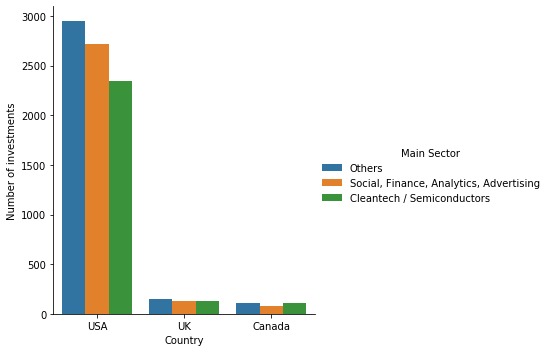

In [301]:
sns.catplot(data = plot3, y = "Number of investments", x = 'Country',hue = "Main Sector",kind="bar" )
pt.show()

In [302]:
D1

,company_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector,No_of_investments,investment_amount
0,/organization/0xdata,venture,8900000.0,H2O.ai,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
1,/organization/accelerated-vision-group,venture,6000000.0,Accelerated Vision Group,Analytics,operating,USA,Analytics,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
2,/organization/accelops,venture,7000000.0,AccelOps,Analytics|Cloud Computing|Cloud Management|Net...,operating,USA,Analytics,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
3,/organization/adaptive-insights,venture,14000000.0,Adaptive Insights,Analytics|Business Analytics|Cloud Data Servic...,operating,USA,Analytics,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
4,/organization/adaptive-insights,venture,7500000.0,Adaptive Insights,Analytics|Business Analytics|Cloud Data Servic...,operating,USA,Analytics,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
...,...,...,...,...,...,...,...,...,...,...,...
12058,/organization/washio,venture,10500000.0,Washio,Service Industries,operating,USA,Service Industries,Others,2950,2.632101e+10
12059,/organization/waze,venture,12000000.0,Waze,Navigation|Transportation,acquired,USA,Navigation,"News, Search and Messaging",1583,1.397157e+10
12060,/organization/wizrocket-technologies,venture,8000000.0,CleverTap,Consumer Behavior|Mobile Analytics|SaaS,operating,USA,Consumer Behavior,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
12061,/organization/yapta,venture,5000000.0,Yapta,Tracking|Transportation|Travel,operating,USA,Tracking,Others,2950,2.632101e+10


In [303]:
D1.groupby('name')['company_permalink'].count().sort_values(ascending = False).head(10).reset_index()

,name,company_permalink
0,Airspan Networks,9
1,Tigo Energy,8
2,Biodesix,8
3,EndoGastric Solutions,7
4,SST Inc. (Formerly ShotSpotter),7
5,NetBase Solutions,7
6,Avnera,7
7,ForSight Labs,7
8,PatientKeeper,6
9,VeriSilicon Holdings,6


In [304]:
D1.groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head(10)

name
Airspan Networks                   81769000.0
Biodesix                           75300000.0
Avnera                             71062970.0
Tigo Energy                        68739496.0
SST Inc. (Formerly ShotSpotter)    67933006.0
EndoGastric Solutions              67896724.0
Virtustream                        64300000.0
Demandbase                         63000000.0
Intacct                            61800000.0
ForSight Labs                      61300001.0
Name: raised_amount_usd, dtype: float64

In [305]:
D2.groupby('name')['company_permalink'].count().sort_values(ascending = False).head(10).reset_index()

,name,company_permalink
0,Celltick Technologies,4
1,Ubiquisys,4
2,GreenRoad Technologies,4
3,Electric Cloud,4
4,myThings,4
5,SenSage,4
6,Autoquake,4
7,SilverRail Technologies,3
8,F-star Biotechnology Limited,3
9,Amplience,3


In [306]:
D3.groupby('name')['company_permalink'].count().sort_values(ascending = False).head(10).reset_index()

,name,company_permalink
0,Ostara,4
1,Fresco Microchip,4
2,Wave Accounting,4
3,Wavesat,3
4,REGEN Energy,3
5,NewStep Networks,3
6,Vantrix,3
7,Solantro Semiconductor,3
8,ENBALA Power Networks,3
9,Diablo Technologies,3
